# ANALISIS DE LA CALIDAD DEL VINO - Regresión

El objetivo de esta kata es guiarnos a través de los principales pasos que componen un proyecto de Machine Learning.

Existen ocho pasos principales:

1. Encuadrar el problema y tener la visión global.

2. Obtener los datos.

3. Explorar los datos para obtener ideas.

4. Preparar los datos para exponer lo mejor posible los patrones de datos subyacentes a los algoritmos de Machine Learning.

5. Explorar muchos modelos diferentes y preseleccionar los mejores.

6. Afinar nuestros modelos y combinarlos en una gran solución.

7. Presentar nuestra solución.

8. Implantar, monitorizar y mantener nuestro sistema.


# Encuadrar el problema y tener la visión global

Disponemos un conjunto de datos que contiene diversas características de variantes de tinto y blanco del vino portugués "Vinho Verde". Disponemos de variables químicas, como son la cantidad de alcohol, ácido cítrico, acidez, densidad, pH, etc; así como de una variable sensorial y subjetiva como es la puntuación con la que un grupo de expertos calificaron la calidad del vino: entre 0 (muy malo) y 10 (muy excelente).

El proyecto que nos encargan es que desarrollemos un modelo que pueda predecir la puntuación de calidad dados dichos indicadores bioquímicos.

¿Cómo se enmarcaría este problema (supervisado, no supervisado, etc.)?

¿Cuál es la variable objetivo? ¿Cuáles son los predictores?

¿Cómo vamos a medir el rendimiento de nuestro modelo?

Verificar las asunciones: por ejemplo, para qué se va a utilizar nuestra predicción de puntuación de calidad, ¿se va a utilizar para que otro sistema posterior los catalogue como "malo", "medio", "bueno" o "excelente"? ¿Qué implicaciones tendría?

# Obtener los datos

En este apartado tendríamos que lidiar con el origen de los datos. ¿Se encuentran en una bbdd? ¿Cuál es el formato? ¿Disponemos de las credenciales de acceso? ¿Disponemos de espacio para su manipulación? ¿Se trata de datos sensibles?

Importa las librerías necesarias:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, SGDRegressor, Lasso, ElasticNet, Ridge
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn import metrics

%matplotlib inline

Lee los datos y crea un DataFrame

In [2]:
white = pd.read_csv("data/wine-quality/winequality.csv", sep=";")

# Explorar los datos

En este aparatado comprobaremos el tamaños de los datos, su naturaleza (si son series temporales, datos geográficos, etc.), su tipo (numéricos, categóricos, fechas, texto, objetos, float, etc.) y si existen valores ausentes. Si se trata de aprendizaje supervisado identificaremos cuál/cuáles son los atributos objetivo. Visualizaremos los datos y comprobaremos si existen correlaciones entre ellos y de qué tipo. También identificaremos posibles transformaciones que debamos realizar sobre ellos. Incluso podríamos identificar la necesidad de crear nuevos datos a partir de los existentes.

¿Cuál es el tamaño de los datasets?

In [16]:
white.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
6492    False
6493    False
6494     True
6495    False
6496    False
Length: 6497, dtype: bool

In [3]:
white.shape

(6497, 12)

Es decir, 6.497 instancias (filas) y 12 atributos (columnas)

Muestra las primeras instancias del dataset:

In [18]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

Muestra información básica sobre los campos del dataset:

In [5]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


Hacemos un resumen rápido de los principales indicadores descriptivos del dataset

In [6]:
pd.DataFrame({"Tipo": white.dtypes,
              "Unicos": white.nunique(),
              "Nulos": white.isnull().sum(),
              "Nulos percent": white.isnull().sum() / len(white),
              "Media": white.mean(),
              "Desviacion": white.std()})

Tipo  Unicos  Nulos  Nulos percent       Media  \
fixed acidity         float64     106      0            0.0    7.215307   
volatile acidity      float64     187      0            0.0    0.339666   
citric acid           float64      89      0            0.0    0.318633   
residual sugar        float64     316      0            0.0    5.443235   
chlorides             float64     214      0            0.0    0.056034   
free sulfur dioxide   float64     135      0            0.0   30.525319   
total sulfur dioxide  float64     276      0            0.0  115.744574   
density               float64     998      0            0.0    0.994697   
pH                    float64     108      0            0.0    3.218501   
sulphates             float64     111      0            0.0    0.531268   
alcohol               float64     111      0            0.0   10.491801   
quality                 int64       7      0            0.0    5.818378   

                      Desviacion  
fixed acidity           1.296434  
volatile acidity        0.164636  
citric acid             0.145318  
residual sugar          4.757804  
chlorides               0.035034  
free sulfur dioxide    17.749400  
total sulfur dioxide   56.521855  
density                 0.002999  
pH                      0.160787  
sulphates               0.148806  
alcohol                 1.192712  
quality                 0.873255

Mmmmm, no existen nulos, qué dataset 

In [7]:
white.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

¿Cómo se distribuyen las variables? Realiza un gráfico compuesto que muestre un histograma por cada variable

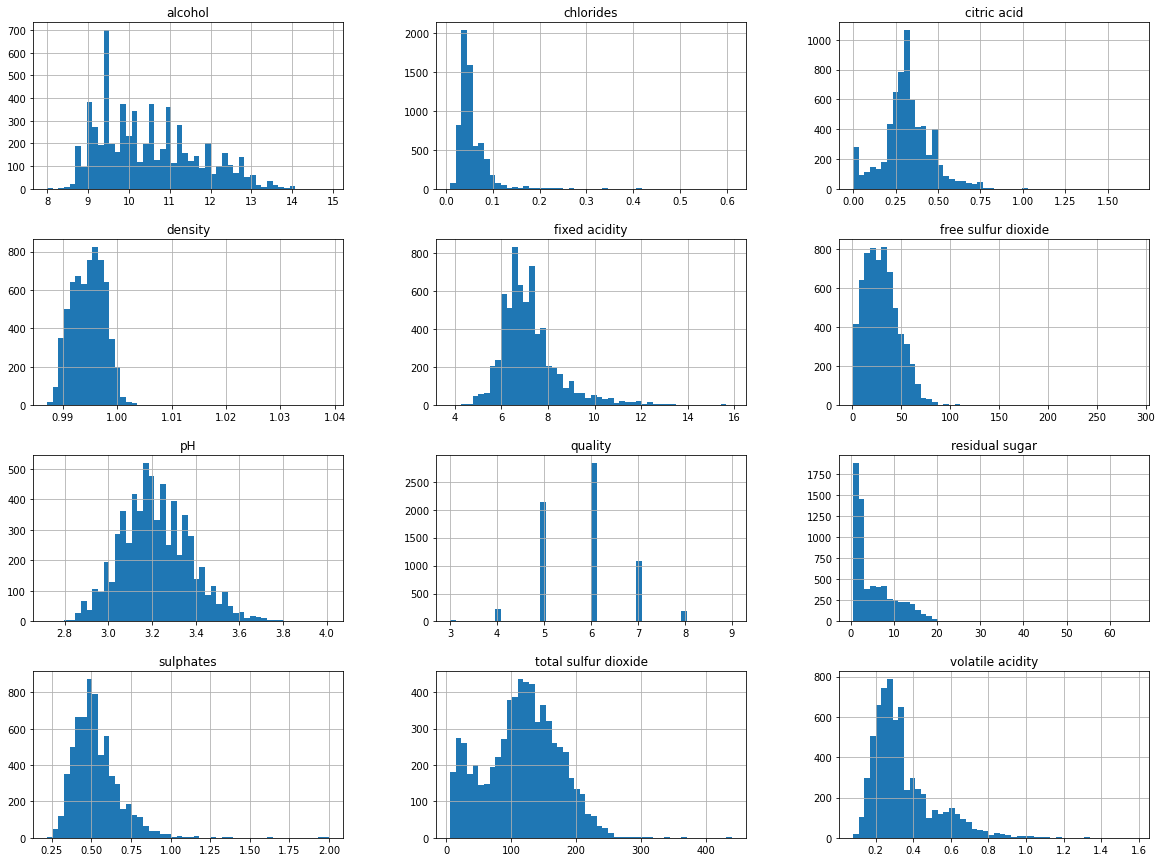

In [8]:
white.hist(bins=50, figsize=(20,15));

Comprobemos cómo se distribuye nuestra variable objetivo, la puntución de calidad:

In [9]:
print(f"Porcentaje de cada una de las puntuaciones de calidad")
white["quality"].value_counts(normalize=True)*100

Porcentaje de cada una de las puntuaciones de calidad


6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64

Se encuentra significativamente desbalanceado. La mayoría de las instancias (75%) tienen puntuaciones de 6 ó 5.

Comprueba las correlaciones entre los atributos del dataset

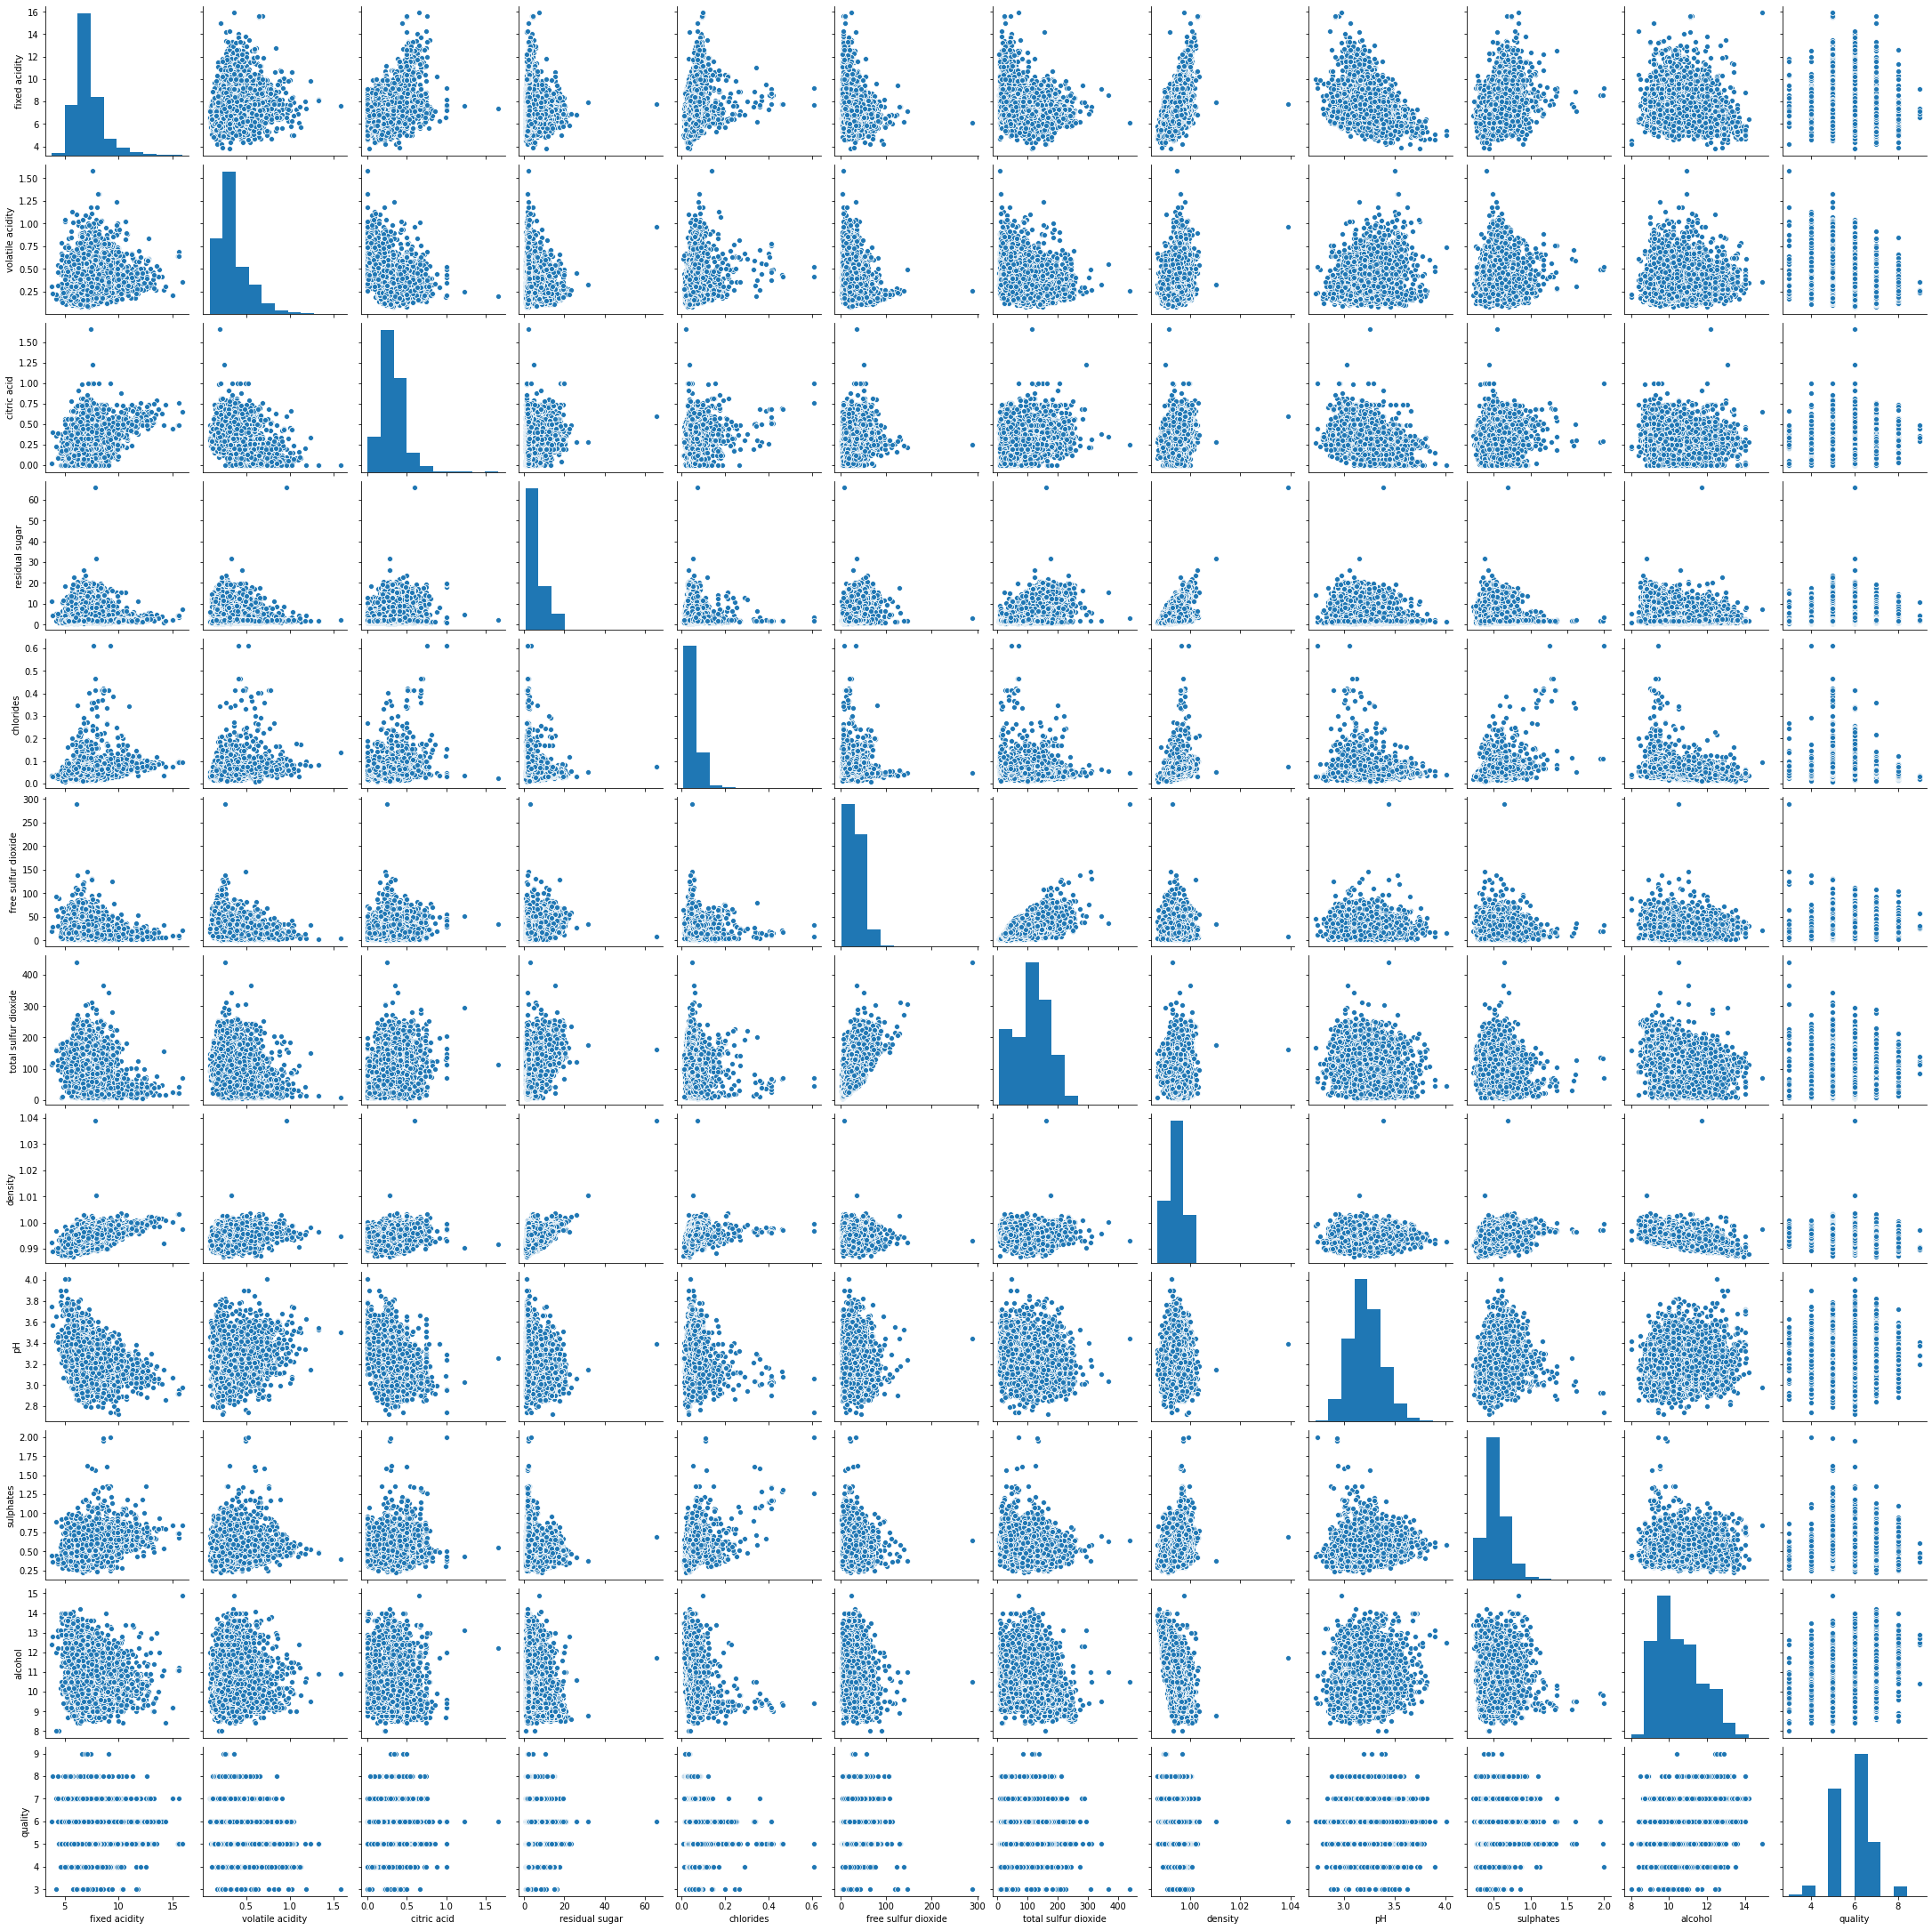

In [10]:
sns.pairplot(white)

In [11]:
corr_matrix = white.corr()
corr_matrix

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.111981   0.298195            -0.282735   
volatile acidity           -0.196011   0.377124            -0.352557   
citric acid                 0.142451   0.038998             0.133126   
residual sugar              1.000000  -0.128940             0.402871   
chlorides                  -0.128940   1.000000            -0.195045   
free sulfur dioxide         0.402871  -0.195045             1.000000   
total sulfur dioxide        0.495482  -0.279630             0.720934   
density                     0.552517   0.362615             0.025717   
pH                         -0.267320   0.044708            -0.145854   
sulphates                  -0.185927   0.395593            -0.188457   
alcohol                    -0.359415  -0.256916            -0.179838   
quality                    -0.036980  -0.200666             0.055463   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.329054  0.458910 -0.252700   0.299568   
volatile acidity                 -0.414476  0.271296  0.261454   0.225984   
citric acid                       0.195242  0.096154 -0.329808   0.056197   
residual sugar                    0.495482  0.552517 -0.267320  -0.185927   
chlorides                        -0.279630  0.362615  0.044708   0.395593   
free sulfur dioxide               0.720934  0.025717 -0.145854  -0.188457   
total sulfur dioxide              1.000000  0.032395 -0.238413  -0.275727   
density                           0.032395  1.000000  0.011686   0.259478   
pH                               -0.238413  0.011686  1.000000   0.192123   
sulphates                        -0.275727  0.259478  0.192123   1.000000   
alcohol                          -0.265740 -0.686745  0.121248  -0.003029   
quality                          -0.041385 -0.305858  0.019506   0.038485   

                       alcohol   quality  
fixed acidity        -0.095452 -0.076743  
volatile acidity     -0.037640 -0.265699  
citric acid          -0.010493  0.085532  
residual sugar       -0.359415 -0.036980  
chlorides            -0.256916 -0.200666  
free sulfur dioxide  -0.179838  0.055463  
total sulfur dioxide -0.265740 -0.041385  
density              -0.686745 -0.305858  
pH                    0.121248  0.019506  
sulphates            -0.003029  0.038485  
alcohol               1.000000  0.444319  
quality               0.444319  1.000000

Muestra solo las correlaciones de la variable objetivo con el resto de atributos

In [12]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

Representa gráficamente dichas correlaciones

In [13]:
white.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

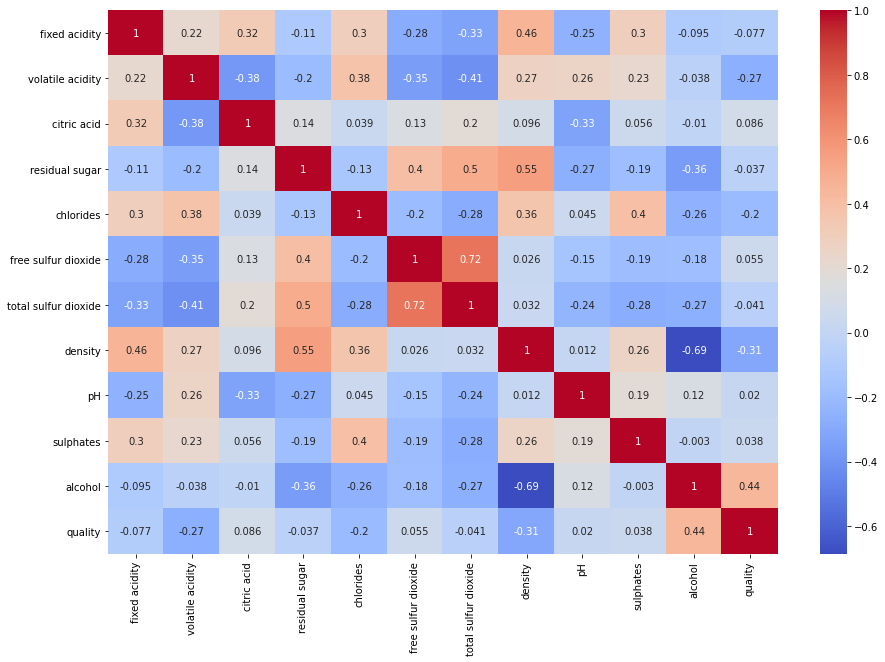

In [14]:
plt.figure(figsize=(15,10))
sns.heatmap(white.corr(), annot=True, cmap='coolwarm')
plt.show()

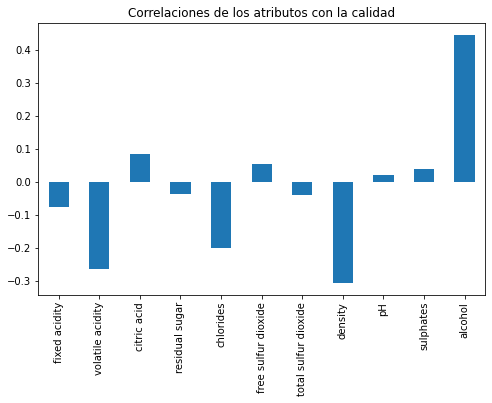

In [15]:
plt.figure(figsize=(8,5))
corr_matrix["quality"].drop("quality").plot(kind='bar')
plt.title("Correlaciones de los atributos con la calidad")
plt.show()

# Preparar los datos

En este apartado llevaríamos a cabo la ingeniería de características o *feature engineering*: realizar las transformaciones necesarias en los datos (escalado, transformaciones de valores categóricos, etc.). Crearíamos nuevas features si fuera necesario. También trataríamos el problemas de los valores nulos. Procederíamos a la limpieza del dataset, eliminando aquellos atributos que no proporcionen información útil.

# Seleccionar y entrenar modelos

El objetivo de esta fase es entrenar muchos modelos rápidamente y sin refinar, de diferentes categorías (es decir, lineales, SVM, Random Forests, redes neuronales, etc.) usando los parámetros estándares. La idea es tener un visión rápida de qué modelos son más prometedores. Medir y comparar la ejecución de todos ellos. Selecciona los mejores modelos.

Crea el dataset de predictores y el dataset con la variable objetivo

In [16]:
predict_columns = white.columns[:-1]
predict_columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
X = white[predict_columns]
y = white["quality"]

Crea los datasets necesarios para dispones de datos de entrenamiento y prueba

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

Selecciona y crea el modelo que vas a entrenar, en este caso un modelo de regresión lineal

In [19]:
lr = LinearRegression()

Entrena el modelo con los datos de entrenamiento

In [20]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(*Opcional*) Dado que estamos entrenando un modelo de regresión lineal, ¿cuáles son los coeficientes estimados de la ecuación de regresión resultantes después del entrenamiento?

Recordemos la fórmula de la ecuación de regresión:

![regresion](images/formula_regresion.png)

In [21]:
lr.coef_

array([ 6.59334936e-02, -1.31772576e+00, -9.32213416e-02,  4.37892699e-02,
       -3.72031576e-01,  6.34163663e-03, -2.68926741e-03, -5.20183373e+01,
        4.00154154e-01,  7.83656291e-01,  2.66971627e-01])

(*Opcional*) ¿Cuál sería el término independiente estimado de la ecuación de regresión resultante después del entrenamiento?

In [22]:
lr.intercept_

52.955060588090134

In [23]:
pd.DataFrame(lr.coef_, X_test.columns, columns=["Coeficientes"])

Coeficientes
fixed acidity             0.065933
volatile acidity         -1.317726
citric acid              -0.093221
residual sugar            0.043789
chlorides                -0.372032
free sulfur dioxide       0.006342
total sulfur dioxide     -0.002689
density                 -52.018337
pH                        0.400154
sulphates                 0.783656
alcohol                   0.266972

Una vez entrenado el modelo, realiza predicciones con los datos de prueba

In [24]:
y_pred = lr.predict(X_test)

veamos, cuáles han sido las predicciones:

In [25]:
df = pd.DataFrame({'Real': y_test, 'Predicción': y_pred, 'Error': y_test-y_pred})
df

Real  Predicción     Error
3103     7    6.351679  0.648321
1419     7    5.995947  1.004053
4761     6    5.753849  0.246151
4690     6    5.377825  0.622175
4032     5    5.722258 -0.722258
...    ...         ...       ...
889      7    6.226976  0.773024
2850     5    5.757444 -0.757444
4917     6    5.577763  0.422237
5198     6    5.671138  0.328862
5643     6    5.433458  0.566542

[1300 rows x 3 columns]

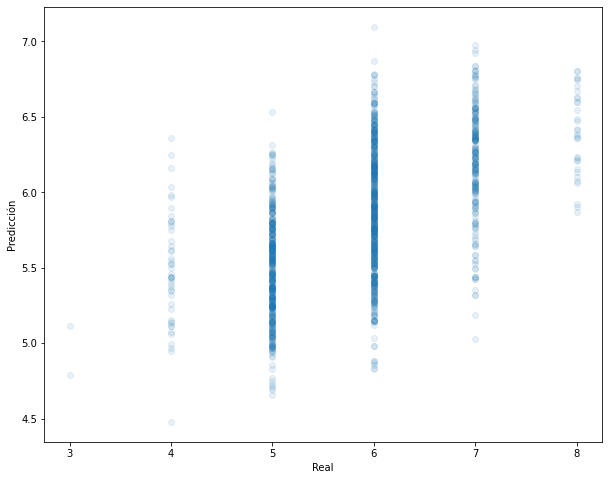

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.show()

¿Qué rendimiento tiene el modelo con las métricas que has elegido?

In [27]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2: {lr.score(X_test, y_test)}")

MAE: 0.5466402349140571
MSE: 0.4767429335201207
RMSE: 0.6904657366735302
R2: 0.33303955208271774


In [28]:
metrics.explained_variance_score(y_test, y_pred)

0.33322106242102134

¿Cómo se distribuyen los errores de predicción?

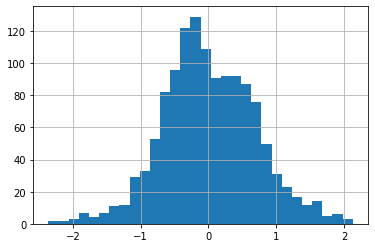

In [29]:
df["Error"].hist(bins=30);

### Comentarios iniciales a los resultados

La puntuación de R2 es muy baja. Según el valor obtenido de R2, nuestro modelo apenas puede explicar un 33% de la varianza. Es decir, el porcentaje de relación entre las variables que puede explicarse mediante nuestro modelo lineal es del 33,32%. Esto no es necesariamente malo, este indicador no explica por si solo si un modelo es bueno o malo.

R2 varía entre 0 y 1. Es la proporción de la varianza en la variable dependiente (*nuestra variable objetivo*) que es predecible a partir de las variables independientes (*nuestros predictores*). Si la predicción fuera exactamente igual a lo real, R2 = 1 (es decir, 100%).

El RMSE = 0,69. Es decir, tenemos un error típico de predicción de 0,69.

Según la gráfica podemos observar que nuestro modelo no es muy bueno para valores extremos de puntuación. De hecho no es capaz de predecir ninguna puntuación de 3 ni de 8. Según vimos en la distribución de la variable objetivo, se encuentra muy desbalanceada, apenas existen obervaciones para los valores extremos, por lo que el modelo no tiene suficientes datos de entrenamiento para todas las puntuaciones de calidad.

### Selección de características

Vamos a usar RFECV para determinar el nº de features válidas con cross-validation.

In [30]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.model_selection import StratifiedKFold

lr = LinearRegression()
selector = RFECV(lr, step=1, cv=StratifiedKFold())
selector = selector.fit(X_train, y_train)
pd.DataFrame({"Feature": predict_columns, "Support": selector.support_})

Feature  Support
0          fixed acidity     True
1       volatile acidity     True
2            citric acid     True
3         residual sugar     True
4              chlorides     True
5    free sulfur dioxide     True
6   total sulfur dioxide     True
7                density     True
8                     pH     True
9              sulphates     True
10               alcohol     True

In [31]:
pd.DataFrame({"Feature": predict_columns, "Ranking": selector.ranking_})

Feature  Ranking
0          fixed acidity        1
1       volatile acidity        1
2            citric acid        1
3         residual sugar        1
4              chlorides        1
5    free sulfur dioxide        1
6   total sulfur dioxide        1
7                density        1
8                     pH        1
9              sulphates        1
10               alcohol        1

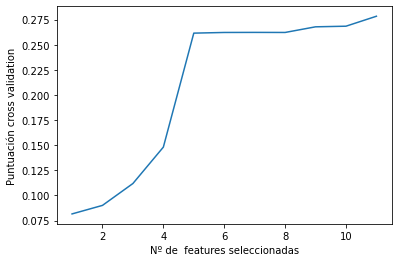

In [32]:
# Dibuja el número de features vs la puntuación a través de cross-validation
plt.figure()
plt.xlabel("Nº de  features seleccionadas")
plt.ylabel("Puntuación cross validation")
plt.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
plt.show()

La conclusión es que todas las variables son importantes para el modelo, ya que se obtiene la máxima puntuación con las 10 features seleccionadas.

In [33]:
selector.grid_scores_

array([0.08162113, 0.09010922, 0.11189375, 0.14810959, 0.26157169,
       0.26224126, 0.26231103, 0.26224491, 0.26785884, 0.26847728,
       0.27838696])

***************************************************************

**ENTRENAMOS y VALIDAMOS CON CROSS-VALIDATION con los datos entrenamiento, ¡¡¡siempre!!!**

In [34]:
def evaluate_model(estimator, X_train, y_train, cv=10):
    """Print and return cross validation of model
    """
    scoring = ["neg_mean_absolute_error", "neg_mean_squared_error", "r2"]
    scores = cross_validate(estimator, X_train, y_train, return_train_score=True, cv=cv, scoring=scoring)
    
    val_mae_mean, val_mae_std = -scores['test_neg_mean_absolute_error'].mean(), \
                                -scores['test_neg_mean_absolute_error'].std()
    
    train_mae_mean, train_mae_std = -scores['train_neg_mean_absolute_error'].mean(), \
                                    -scores['train_neg_mean_absolute_error'].std()
    
    val_mse_mean, val_mse_std = -scores['test_neg_mean_squared_error'].mean(), \
                                -scores['test_neg_mean_squared_error'].std()
    
    train_mse_mean, train_mse_std = -scores['train_neg_mean_squared_error'].mean(), \
                                    -scores['train_neg_mean_squared_error'].std()
    
    val_rmse_mean, val_rmse_std = np.sqrt(-scores['test_neg_mean_squared_error']).mean(), \
                                  np.sqrt(-scores['test_neg_mean_squared_error']).std()
    
    train_rmse_mean, train_rmse_std = np.sqrt(-scores['train_neg_mean_squared_error']).mean(), \
                                      np.sqrt(-scores['train_neg_mean_squared_error']).std()
    
    val_r2_mean, val_r2_std = scores['test_r2'].mean(), scores['test_r2'].std()
    
    train_r2_mean, train_r2_std = scores['train_r2'].mean(), scores['train_r2'].std()

    
    print(f"val_MAE_mean: {val_mae_mean} - (std: {val_mae_std})")
    print(f"train_MAE_mean: {train_mae_mean} - (std: {train_mae_std})")
    print(f"val_MSE_mean: {val_mse_mean} - (std: {val_mse_std})")
    print(f"train_MSE_mean: {train_mse_mean} - (std: {train_mse_std})")
    print(f"val_RMSE_mean: {val_rmse_mean} - (std: {val_rmse_std})")
    print(f"train_RMSE_mean: {train_rmse_mean} - (std: {train_rmse_std})")
    print(f"val_R2_mean: {val_r2_mean} - (std: {val_r2_std})")
    print(f"train_R2_mean: {train_r2_mean} - (std: {train_r2_std})")
    
    
    result = {
        "Val MAE": val_mae_mean,
        "Val MAE std": val_mae_std,
        "Train MAE": train_mae_mean,
        "Train MAE std": train_mae_std,
        "Val MSE": val_mse_mean,
        "Val MSE std": val_mse_std,
        "Train MSE": train_mse_mean,
        "Train MSE std": train_mse_std,
        "Val RMSE": val_rmse_mean,
        "Val RMSE std": val_rmse_std,
        "Train RMSE": train_rmse_mean,
        "Train RMSE std": train_rmse_std,
        "Val R2": val_r2_mean,
        "Val R2 std": val_r2_std,
        "Train R2": train_rmse_mean,
        "Train R2 std": train_r2_std,
    }

    return result

In [35]:
lin_scores = evaluate_model(lr, X_train, y_train)

val_MAE_mean: 0.5755434167859681 - (std: -0.01720171882043789)
train_MAE_mean: 0.573678690436551 - (std: -0.0019117526168871103)
val_MSE_mean: 0.5594048787562983 - (std: -0.03520032472946418)
train_MSE_mean: 0.5555813153741704 - (std: -0.0038251277024970833)
val_RMSE_mean: 0.7475578342491416 - (std: 0.02370998121110692)
train_RMSE_mean: 0.7453688624143519 - (std: 0.0025640431559359736)
val_R2_mean: 0.2771213590041644 - (std: 0.02087689834991067)
train_R2_mean: 0.28253737735555057 - (std: 0.002251057804010704)


****************************************************

# Exploración de varios modelos

Vamos a probar de forma rápida varios modelos de regresión. Seleccionamos algunos de los modelos de regresión: Regresión Lineal, Lasso, ElasticNet, Ridge, Support Vector Machine y RandomForest.

In [36]:
#models = [LinearRegression(), Lasso(alpha=0.1), ElasticNet(),
#          Ridge(), SVR(kernel="linear"), ExtraTreesRegressor(), RandomForestRegressor()]

models = [LinearRegression(), Lasso(alpha=0.1), ElasticNet(),
          Ridge(), ExtraTreesRegressor(), RandomForestRegressor()]

model_names = ["Regresión Lineal", "Lasso", "ElasticNet",
               "Ridge", "Extra Tree", "Random Forest"]

In [37]:
models

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
       normalize=False, positive=False, precompute=False, random_state=None,
       selection='cyclic', tol=0.0001, warm_start=False),
 ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
            max_iter=1000, normalize=False, positive=False, precompute=False,
            random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
       normalize=False, random_state=None, solver='auto', tol=0.001),
 ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.0,
                     min_impurity_split=None, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0

Entrenamiento y predicción

In [38]:
mae = []
mse = []
rmse = []
r2 = []
preds = []

for model in range(len(models)):
    print(f"Paso {model+1} de {len(models)}")
    print(f"...evaluando {model_names[model]}")
    
    rg_scores = evaluate_model(models[model], X_train, y_train)
    
    mae.append(rg_scores["Val MAE"])
    mse.append(rg_scores["Val MSE"])
    rmse.append(rg_scores["Val RMSE"])
    r2.append(rg_scores["Val R2"])
    #preds.append(y_pred)

Paso 1 de 6
...evaluando Regresión Lineal
val_MAE_mean: 0.5755434167859681 - (std: -0.01720171882043789)
train_MAE_mean: 0.573678690436551 - (std: -0.0019117526168871103)
val_MSE_mean: 0.5594048787562983 - (std: -0.03520032472946418)
train_MSE_mean: 0.5555813153741704 - (std: -0.0038251277024970833)
val_RMSE_mean: 0.7475578342491416 - (std: 0.02370998121110692)
train_RMSE_mean: 0.7453688624143519 - (std: 0.0025640431559359736)
val_R2_mean: 0.2771213590041644 - (std: 0.02087689834991067)
train_R2_mean: 0.28253737735555057 - (std: 0.002251057804010704)
Paso 2 de 6
...evaluando Lasso
val_MAE_mean: 0.6175159498199335 - (std: -0.019425966596678747)
train_MAE_mean: 0.6169444370304975 - (std: -0.0021375654234869848)
val_MSE_mean: 0.6177576092063118 - (std: -0.04525638136734731)
train_MSE_mean: 0.6158016394028561 - (std: -0.004710139671502789)
val_RMSE_mean: 0.7854562767838422 - (std: 0.028566527040855678)
train_RMSE_mean: 0.7847245533925972 - (std: 0.00300244994048678)
val_R2_mean: 0.20225577

In [40]:
df_result = pd.DataFrame({"Modelo": model_names,
                          "MAE": mae,
                          "MSE": mse,
                          "RMSE": rmse,
                          "R2": r2})

In [41]:
df_result

Modelo       MAE       MSE      RMSE        R2
0  Regresión Lineal  0.575543  0.559405  0.747558  0.277121
1             Lasso  0.617516  0.617758  0.785456  0.202256
2        ElasticNet  0.681188  0.763159  0.873184  0.014047
3             Ridge  0.577027  0.560724  0.748468  0.275313
4        Extra Tree  0.396737  0.365213  0.603631  0.527574
5     Random Forest  0.442436  0.385962  0.620407  0.501224

Vamos a visualizar cómo se han comportado cada uno de ellos:

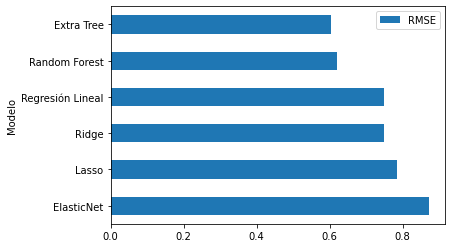

In [42]:
df_result.sort_values(by="RMSE", ascending=False).plot.barh("Modelo", "RMSE");

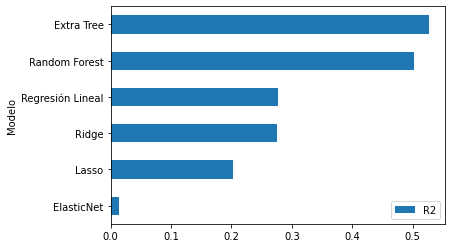

In [43]:
df_result.sort_values(by="R2").plot.barh("Modelo", "R2");

In [44]:
for i in range(len(preds)):
    plt.scatter(y_test, preds[i], alpha=0.1)
    plt.xlabel("Real")
    plt.ylabel("Predicción")
    plt.title(model_names[i])
    plt.show()

# Afinar nuestros mejores modelos

El modelo que arroja mejores resultados es **extra-trees**. Vamos a realizar un ajuste más fino con él.

In [52]:
param_grid = [
    {'n_estimators': range(10, 300, 10), 'max_features': [2, 3, 4, 5, 8, "auto"], 'bootstrap': [True, False]}
]


xtree_reg = ExtraTreesRegressor(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(xtree_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error', 
                           return_train_score=True, verbose=2)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 348 candidates, totalling 1740 fits
[CV] bootstrap=True, max_features=2, n_estimators=10 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. bootstrap=True, max_features=2, n_estimators=10, total=   1.5s
[CV] bootstrap=True, max_features=2, n_estimators=10 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


[CV] .. bootstrap=True, max_features=2, n_estimators=10, total=   0.6s
[CV] bootstrap=True, max_features=2, n_estimators=10 .................
[CV] .. bootstrap=True, max_features=2, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_features=2, n_estimators=10 .................
[CV] .. bootstrap=True, max_features=2, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_features=2, n_estimators=10 .................
[CV] .. bootstrap=True, max_features=2, n_estimators=10, total=   0.0s
[CV] bootstrap=True, max_features=2, n_estimators=20 .................
[CV] .. bootstrap=True, max_features=2, n_estimators=20, total=   0.0s
[CV] bootstrap=True, max_features=2, n_estimators=20 .................
[CV] .. bootstrap=True, max_features=2, n_estimators=20, total=   0.0s
[CV] bootstrap=True, max_features=2, n_estimators=20 .................
[CV] .. bootstrap=True, max_features=2, n_estimators=20, total=   0.0s
[CV] bootstrap=True, max_features=2, n_estimators=20 .................
[CV] .

[Parallel(n_jobs=1)]: Done 1740 out of 1740 | elapsed:  9.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=-1,
                                           oob_score=False, random_state=42,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_g

In [53]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 4, 'n_estimators': 240}

In [54]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.6529916588574092 {'bootstrap': True, 'max_features': 2, 'n_estimators': 10}
0.6382978750383306 {'bootstrap': True, 'max_features': 2, 'n_estimators': 20}
0.6335964844540848 {'bootstrap': True, 'max_features': 2, 'n_estimators': 30}
0.6316642452918141 {'bootstrap': True, 'max_features': 2, 'n_estimators': 40}
0.6300112852289287 {'bootstrap': True, 'max_features': 2, 'n_estimators': 50}
0.6292961236203952 {'bootstrap': True, 'max_features': 2, 'n_estimators': 60}
0.6288968774243132 {'bootstrap': True, 'max_features': 2, 'n_estimators': 70}
0.6277521836370533 {'bootstrap': True, 'max_features': 2, 'n_estimators': 80}
0.6267791632806922 {'bootstrap': True, 'max_features': 2, 'n_estimators': 90}
0.6265457679215165 {'bootstrap': True, 'max_features': 2, 'n_estimators': 100}
0.6260122370019346 {'bootstrap': True, 'max_features': 2, 'n_estimators': 110}
0.6257127485606199 {'bootstrap': True, 'max_features': 2, 'n_estimators': 120}
0.6255647357927018 {'bootstrap': True, 'max_features': 2, 'n_

In [55]:
#feature_importance = grid_search.best_estimator_.feature_importances_

In [58]:
final_model = grid_search.best_estimator_
y_pred = final_model.predict(X_test)

In [59]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")
print(f"R2: {final_model.score(X_test, y_test)}")

MAE: 0.3576634615384615
MSE: 0.29952875267094015
RMSE: 0.54729220044775
R2: 0.580961107130739


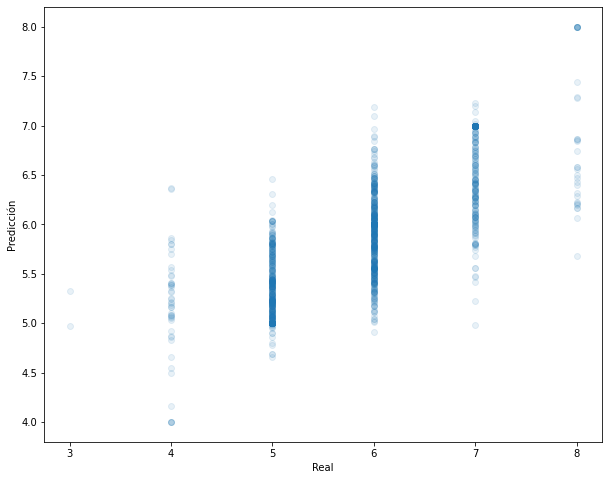

In [60]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred, alpha=0.1)
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.show()

**Comprobamos qué predictores son más relevantes para la predicción:**

In [72]:
feature_importances = final_model.feature_importances_
feature_importances

array([0.06767335, 0.11287471, 0.07316336, 0.07234461, 0.06965486,
       0.08763345, 0.0759076 , 0.08983553, 0.06945395, 0.076963  ,
       0.20449559])

In [75]:
sorted(zip(feature_importances, X_test.columns), reverse=True)

[(0.20449558776387708, 'alcohol'),
 (0.11287470548468308, 'volatile acidity'),
 (0.08983553127367669, 'density'),
 (0.08763345000662394, 'free sulfur dioxide'),
 (0.07696300240826544, 'sulphates'),
 (0.07590760094000676, 'total sulfur dioxide'),
 (0.07316335701285019, 'citric acid'),
 (0.07234460654095422, 'residual sugar'),
 (0.06965486273813697, 'chlorides'),
 (0.06945394812998125, 'pH'),
 (0.06767334770094435, 'fixed acidity')]

Text(0.5, 1.0, 'Feature Importances')

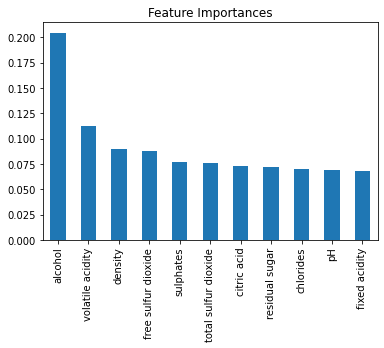

In [76]:
feature_imp = pd.Series(feature_importances, index=X_train.columns).sort_values(ascending=False)
feature_imp.plot(kind='bar')
plt.title('Feature Importances')

**Vamos a ver cómo se distribuyen los errores:**

In [61]:
df_resul = pd.DataFrame({"Pred": y_pred,
              "Real": y_test,
              "error": y_pred - y_test,
              "error_abs": abs(y_pred - y_test)})

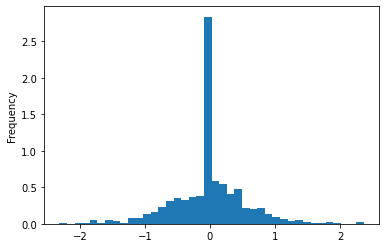

In [62]:
df_resul["error"].plot.hist(bins=40, density=True);

Parace que los errores siguen una distribución gaussiana.

In [63]:
df_resul["error"].apply(np.square).mean()

0.29952875267094015

¿Cuál es el MAE que se produce en la puntuaciónes 6?:

In [64]:
df_resul[df_resul["Real"].isin([6])]["error"].abs().mean()

0.2404289004029937

Más en general ¿Cuál es el MAE que se produce en cada puntuación de calidad?

In [65]:
df_resul.groupby("Real")["error_abs"].mean()

Real
3    2.150000
4    1.169928
5    0.298621
6    0.240429
7    0.477130
8    1.149089
Name: error_abs, dtype: float64

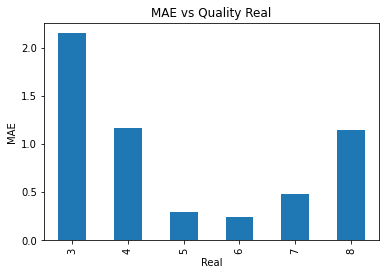

In [66]:
df_resul.groupby("Real")["error_abs"].mean().plot.bar()
plt.title("MAE vs Quality Real")
plt.ylabel("MAE");

Se comprueba que en las puntuaciones de calidad extremas el error es elevado, sobre todo en la puntuación 3. Las puntuaciones 5 y 6 es donde menos error se produce.

### Comentarios finales a los resultados

Después de probar diversos modelos, el que mejores resultados a proporcionados es ExtraTrees. Tras un ajuste fino del mismo conseguimos una importante mejora:

+ El modelo básico de regresión linea ofrece un R2: 0.33303955208271774
+ El modelo de Extra Tree ofrece un R2: 0.580961107130739

Sin embargo, la puntuación de R2 sigue siendo muy baja. Según el valor obtenido de R2, nuestro modelo apenas puede explicar un 58% de la varianza. Es decir, el porcentaje de relación entre las variables que puede explicarse mediante nuestro modelo lineal es del 58,09%.

R2 varía entre 0 y 1. Es la proporción de la varianza en la variable dependiente (*nuestra variable objetivo*) que es predecible a partir de las variables independientes (*nuestros predictores*). Si la predicción fuera exactamente igual a lo real, R2 = 1 (es decir, 100%).

El RMSE = 0,55. Es decir, tenemos un error típico de predicción de 0,55.

Según la gráfica de distribución de MAE podemos observar que nuestro modelo no es nada bueno para valores extremos de puntuación. De hecho no es capaz de predecir ninguna puntuación de 3 y apenas alguna de 8. Según vimos en la distribución de la variable objetivo, ésta se encuentra muy desbalanceada, apenas existen observaciones para los valores extremos, por lo que el modelo no tiene suficientes datos de entrenamiento para todas las puntuaciones de calidad.

Como consideración final, deberíamos probar a enfocar el modelado como un problema de clasificación, para evaluar si ofrece mejores resultados que un problema de regresión.

# Guardado del modelo

Como paso final, guardamos nuestro modelo entranado para futuras predicciones.

In [67]:
import joblib

joblib.dump(final_model, "final_model.joblib", compress=True)

['final_model.joblib']